# Step 2: Cloning and Building Darknet

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Step 3: Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [5]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-14 16:33:46--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  45.4MB/s    in 5.6s    

2021-03-14 16:33:52 (42.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run Detections with Darknet and YOLOv3!

In [7]:
# run darknet detection
# !./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

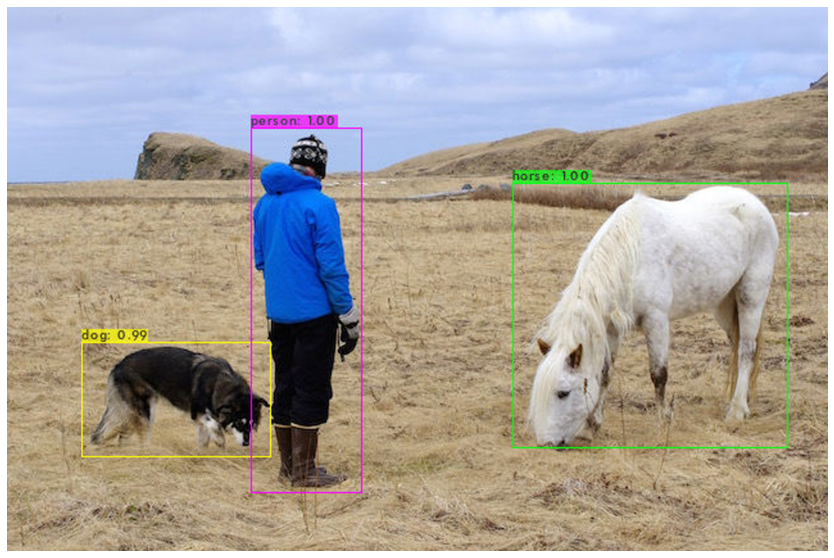

In [9]:
# show image using our helper function
imShow('predictions.jpg')

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       vcpkg.json
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj		       yolov3.weights
CMakeLists.txt	image_yolov4.sh		README.md


In [9]:
%cd /content/gdrive/My Drive/Licenta/ColabStorage
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls

/content/gdrive/My Drive/Licenta/ColabStorage
backup					    img_4k_2.jpg
black_white.jpg				    img_4k_3.jpg
coco.names				    img_4k.png
corrected_license_plate.jpeg		    obj.data
darknet					    obj.names
data					    obj.zip
ExtractedImgForLPR1.png			    OCR
ExtractedImgForLPR2.png			    try3.jpeg
ExtractedImgForLPR3.png			    try4.jpeg
ExtractedImgForLPR4.png			    unnamed.jpg
generate_train.py			    yolov3_custom.cfg
haarcascade_licence_plate_rus_16stages.xml  yolov3_LPR.cfg
haarcascade_russian_plate_number.xml	    yolov3_LPR.weights


/content/gdrive/My Drive/Licenta/ColabStorage/darknet
 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer

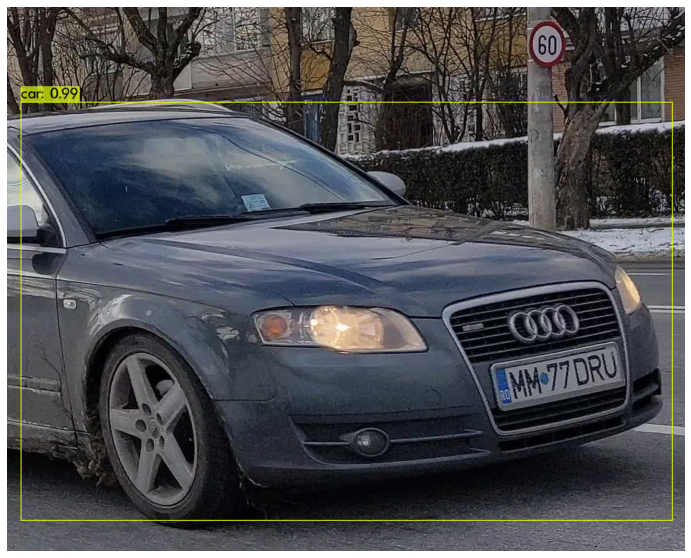

In [10]:
%cd darknet
!chmod +x ./darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/Licenta/ColabStorage/img_4k_2.jpg
imShow('predictions.jpg')

In [13]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
# !cp predictions.jpg /mydrive/Licenta/ColabStorage/detection1.jpg

# Extracting dataset from google drive

In [11]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/Licenta/ColabStorage

backup					    img_4k_2.jpg
black_white.jpg				    img_4k_3.jpg
coco.names				    img_4k.png
corrected_license_plate.jpeg		    obj.data
darknet					    obj.names
data					    obj.zip
ExtractedImgForLPR1.png			    OCR
ExtractedImgForLPR2.png			    try3.jpeg
ExtractedImgForLPR3.png			    try4.jpeg
ExtractedImgForLPR4.png			    unnamed.jpg
generate_train.py			    yolov3_custom.cfg
haarcascade_licence_plate_rus_16stages.xml  yolov3_LPR.cfg
haarcascade_russian_plate_number.xml	    yolov3_LPR.weights


In [12]:
# here you do cd .. until you are in te content folder then enter the darknet folder
%cd ../../../../../
%cd ./darknet

/content
/content/darknet


In [13]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/Licenta/ColabStorage/obj.zip ../

In [14]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/obj/0e54de6ff2fe325d.txt  
  inflating: data/obj/0e69b91442cbc470.jpg  
  inflating: data/obj/0e69b91442cbc470.txt  
  inflating: data/obj/0e917f992b355eb4.jpg  
  inflating: data/obj/0e917f992b355eb4.txt  
  inflating: data/obj/0eb972c67036858b.jpg  
  inflating: data/obj/0eb972c67036858b.txt  
  inflating: data/obj/0ed8805413d3b32f.jpg  
  inflating: data/obj/0ed8805413d3b32f.txt  
  inflating: data/obj/0ef0e703fac8e978.jpg  
  inflating: data/obj/0ef0e703fac8e978.txt  
  inflating: data/obj/0ef79de57ea30a6a.jpg  
  inflating: data/obj/0ef79de57ea30a6a.txt  
  inflating: data/obj/0f1265f984e66def.jpg  
  inflating: data/obj/0f1265f984e66def.txt  
  inflating: data/obj/0f131b8d6b8c0f56.jpg  
  inflating: data/obj/0f131b8d6b8c0f56.txt  
  inflating: data/obj/0f137232e9e731e2.jpg  
  inflating: data/obj/0f137232e9e731e2.txt  
  inflating: data/obj/0f206a5a3a72a771.jpg  
  inflating: data/obj/0f206a5a3a72a771.txt  
  in

# Configure files

In [31]:
# download cfg to google drive and change its name
# !cp cfg/yolov3.cfg /mydrive/Licenta/ColabStorage/yolov3_custom2.cfg

In [15]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/Licenta/ColabStorage/yolov3_custom.cfg ./cfg

In [16]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/Licenta/ColabStorage/obj.names ./data
!cp /mydrive/Licenta/ColabStorage/obj.data  ./data

# Generate train.txt

In [17]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/Licenta/ColabStorage/generate_train.py ./


In [18]:
!python generate_train.py

In [19]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [26]:
!cat data/train.txt

data/obj/d4b98e9c9be484e2.jpg
data/obj/862412ef47f46324.jpg
data/obj/5c71ccd5fc8ab01c.jpg
data/obj/6f6469b661188809.jpg
data/obj/da493f5e4c1ba7ca.jpg
data/obj/f11a4a69d6c4c83a.jpg
data/obj/717e9033c061332e.jpg
data/obj/a5bbc4cf8dc50628.jpg
data/obj/83286e52968aefd8.jpg
data/obj/a84a819630c81d76.jpg
data/obj/1db732bf9563795e.jpg
data/obj/8bb8a2eb3922cb55.jpg
data/obj/0bb0243e342a5ae5.jpg
data/obj/06c957b7a77380ee.jpg
data/obj/c2d410ee730ce201.jpg
data/obj/967c7fac25d65806.jpg
data/obj/b29b6483f41d3fe4.jpg
data/obj/1bf1208c64e53ed8.jpg
data/obj/0f131b8d6b8c0f56.jpg
data/obj/18a2bb401ffb0bbc.jpg
data/obj/ea005023cfbf38be.jpg
data/obj/158a20a5a748b405.jpg
data/obj/024604312c78c4f4.jpg
data/obj/333a78ab0e9f407a.jpg
data/obj/4d015ce83e5a5a02.jpg
data/obj/55447b6030eeaf67.jpg
data/obj/481b877810eba765.jpg
data/obj/13b5ab5b9a288bc4.jpg
data/obj/6b3fa7c35b2aeb97.jpg
data/obj/1c28678228a36a1b.jpg
data/obj/763ab0fa8760b2ae.jpg
data/obj/aebdb647464d1667.jpg
data/obj/5fabc82fbd5f1e22.jpg
data/obj/2

# Download pre-trained weights

In [27]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-03-14 12:44:13--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   104MB/s    in 1.5s    

2021-03-14 12:44:14 (104 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!chmod +x ./darknet
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 387557, rewritten_bbox = 0.407166 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.722273), count: 3, class_loss = 0.058394, iou_loss = 0.167201, total_loss = 0.225595 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.853515), count: 1, class_loss = 0.000332, iou_loss = 0.007758, total_loss = 0.008089 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.518282), count: 1, class_loss = 0.137856, iou_loss = 0.170374, total_loss = 0.308230 
 total_bbox = 387562, rewritten_bbox = 0.407161 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.867702), count: 1, class_loss = 0.126258, iou_loss = 0.009185, total_loss = 0.135443 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.680505), count: 2, class_loss = 0.472397, iou_loss = 0.136342, total_loss = 0.608739 
v3 (ms

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

In [ ]:
imShow('chart.png')

# If google kicks us off, load the last weights and run this

In [28]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/Licenta/ColabStorage/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 23656, rewritten_bbox = 0.325499 % 

 3926: 0.387179, 0.486407 avg loss, 0.000010 rate, 9.504612 seconds, 251264 images, 0.304008 hours left
Loaded: 0.000041 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.891713), count: 2, class_loss = 0.014339, iou_loss = 0.034911, total_loss = 0.049250 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.007058, iou_loss = 0.000000, total_loss = 0.007058 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.558342), count: 1, class_loss = 0.041100, iou_loss = 0.147298, total_loss = 0.188398 
 total_bbox = 23659, rewritten_bbox = 0.325458 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.648418), count: 1, class_loss = 0.198470, iou_loss = 0.089210, total_loss = 0.287680 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.0

# Run my custom object detector

In [20]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

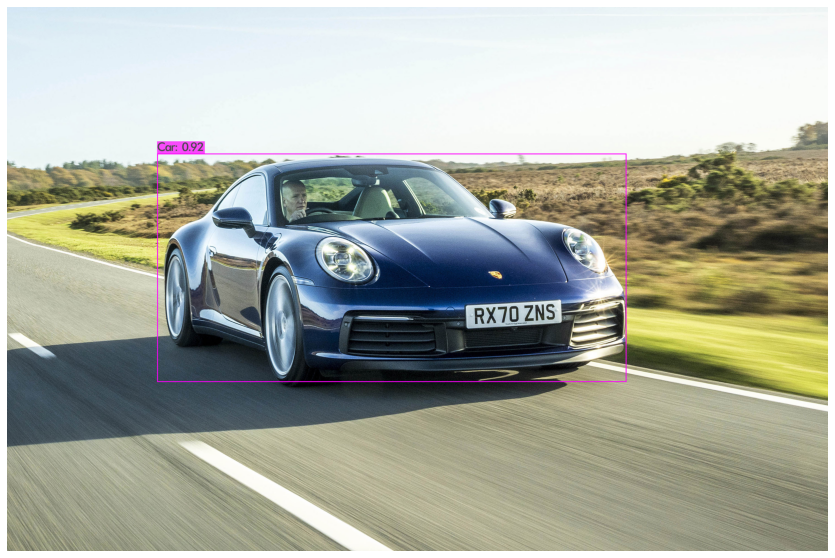

In [22]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/Licenta/ColabStorage/backup/yolov3_custom_last.weights /mydrive/Licenta/ColabStorage/porche.jpg -thresh 0.3
imShow('predictions.jpg')